# Book Recommendation System

In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anssabrar","key":"368ba85cd64eb9ddfb32b0a3f59e5422"}'}

In [4]:
import os
# Create the Kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)
# Move kaggle.json to the Kaggle directory
!mv kaggle.json /root/.kaggle/


mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d zygmunt/goodbooks-10k

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
  0% 0.00/11.6M [00:00<?, ?B/s]
100% 11.6M/11.6M [00:00<00:00, 131MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('goodbooks-10k.zip', 'r') as zip_ref:
    zip_ref.extractall()


Uing kaggle dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df_booktags = pd.read_csv("book_tags.csv")
df_books = pd.read_csv("books.csv")
df_rating = pd.read_csv("ratings.csv")
df_tags = pd.read_csv("tags.csv")
df_toread = pd.read_csv("to_read.csv")

print("booksTags Data:    ", df_booktags.shape)
print("Books Data:    ", df_books.shape)
print("Books-ratings: ", df_rating.shape)
print("Tags:          ", df_tags.shape)
print("To-read:       ", df_toread.shape)

booksTags Data:     (999912, 3)
Books Data:     (10000, 23)
Books-ratings:  (981756, 3)
Tags:           (34252, 2)
To-read:        (912705, 2)


In [10]:
print("books columns", list(df_books.columns))

books columns ['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


In [21]:
print("Books Data:")
print(df_books.head(3))


Books Data:
   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            480006

In [18]:
print("\nBook Tags Data:")
print(df_booktags.head())


Book Tags Data:
   goodreads_book_id  tag_id   count
0                  1   30574  167697
1                  1   11305   37174
2                  1   11557   34173
3                  1    8717   12986
4                  1   33114   12716


In [19]:
print("\nRatings Data:")
print(df_rating.head())


Ratings Data:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


In [20]:
print("\nTags Data:")
print(df_tags.head())



Tags Data:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-


In [22]:
print("\nTo-Read Data:")
print(df_toread.head())


To-Read Data:
   user_id  book_id
0        1      112
1        1      235
2        1      533
3        1     1198
4        1     1874


### Check for missing values

In [24]:

print("\nBooks Data Missing Values:")
print(df_books.isnull().sum())

print ("*********************************")

print("\nBook Tags Data Missing Values:")
print(df_booktags.isnull().sum())

print ("*********************************")

print("\nRatings Data Missing Values:")
print(df_rating.isnull().sum())

print ("*********************************")

print("\nTags Data Missing Values:")
print(df_tags.isnull().sum())

print ("*********************************")

print("\nTo-Read Data Missing Values:")
print(df_toread.isnull().sum())


Books Data Missing Values:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
*********************************

Book Tags Data Missing Values:
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
*****************************

###Data Types and Summary Statistics

In [25]:
# Data types and summary statistics
print("\nBooks Data Info:")
print(df_books.info())
print("\nBooks Data Description:")
print(df_books.describe())

print ("*********************************")

print("\nBook Tags Data Info:")
print(df_booktags.info())
print("\nTags Data Description:")
print(df_booktags.describe())

print ("*********************************")

print("\nRatings Data Info:")
print(df_rating.info())
print("\nRatings Data Description:")
print(df_rating.describe())

print ("*********************************")

print("\nTags Data Info:")
print(df_tags.info())

print ("*********************************")

print("\nTo-Read Data Info:")
print(df_toread.info())



Books Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10

#Data Cleaning

In [26]:
# Removing duplicate entries
df_books = df_books.drop_duplicates()

# Handle missing values: Filling missing values or dropping rows/columns if necessary
df_books = df_books.fillna({'authors': 'Unknown', 'average_rating': df_books['average_rating'].mean()})


In [27]:
# Removing duplicate entries
df_rating = df_rating.drop_duplicates()

# Handle missing values
df_rating = df_rating.dropna()


#Exploratory Data Analysis (EDA)

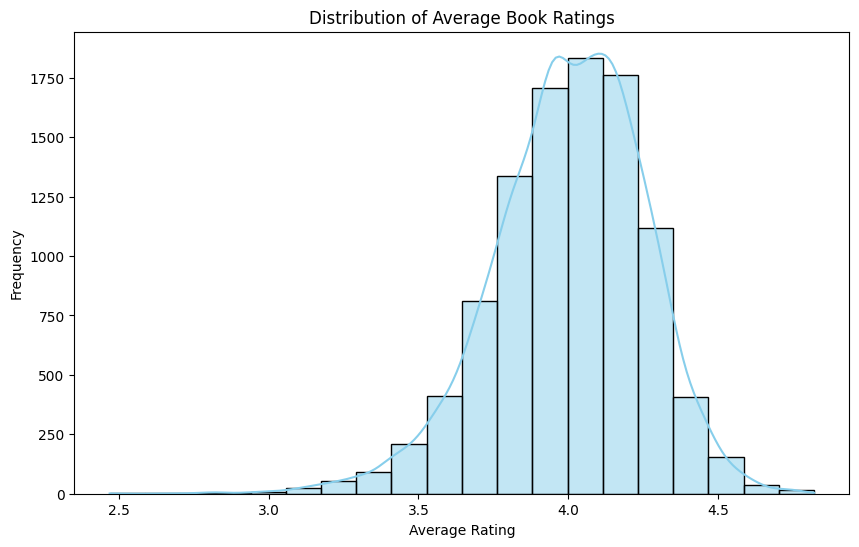

Top 10 Books by Average Rating:
                                                  title  average_rating
3627                     The Complete Calvin and Hobbes            4.82
3274  Harry Potter Boxed Set, Books 1-5 (Harry Potte...            4.77
861      Words of Radiance (The Stormlight Archive, #2)            4.77
8853                           Mark of the Lion Trilogy            4.76
7946                                    ESV Study Bible            4.76
4482  It's a Magical World: A Calvin and Hobbes Coll...            4.75
6360  There's Treasure Everywhere: A Calvin and Hobb...            4.74
421            Harry Potter Boxset (Harry Potter, #1-7)            4.74
3752       Harry Potter Collection (Harry Potter, #1-6)            4.73
6919                The Indispensable Calvin and Hobbes            4.73


In [28]:
# Distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_books['average_rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Top 10 books by average rating
top_books = df_books[['title', 'average_rating']].sort_values(by='average_rating', ascending=False).head(10)
print("Top 10 Books by Average Rating:")
print(top_books)


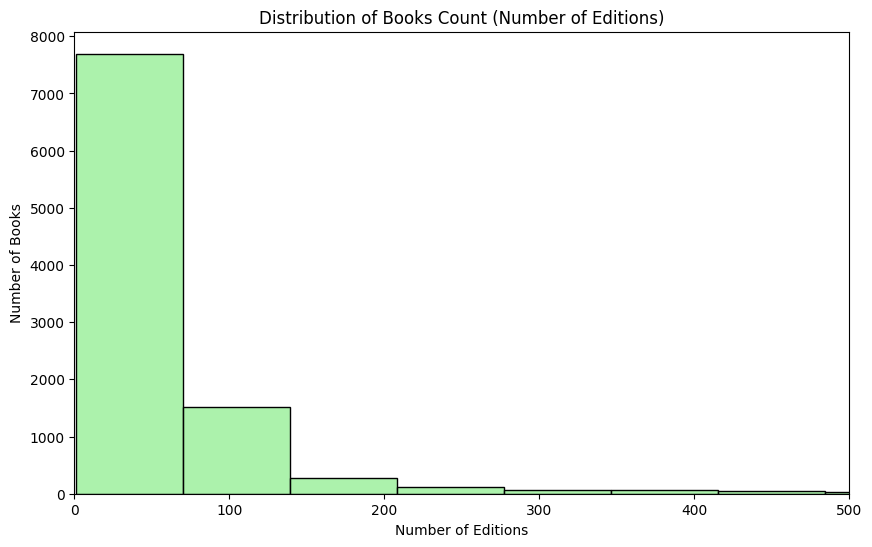

In [32]:
# Distribution of books count (number of editions)
plt.figure(figsize=(10, 6))
sns.histplot(df_books['books_count'], bins=50, kde=False, color='lightgreen')
plt.title('Distribution of Books Count (Number of Editions)')
plt.xlabel('Number of Editions')
plt.ylabel('Number of Books')
plt.xlim(0, 500)
plt.show()

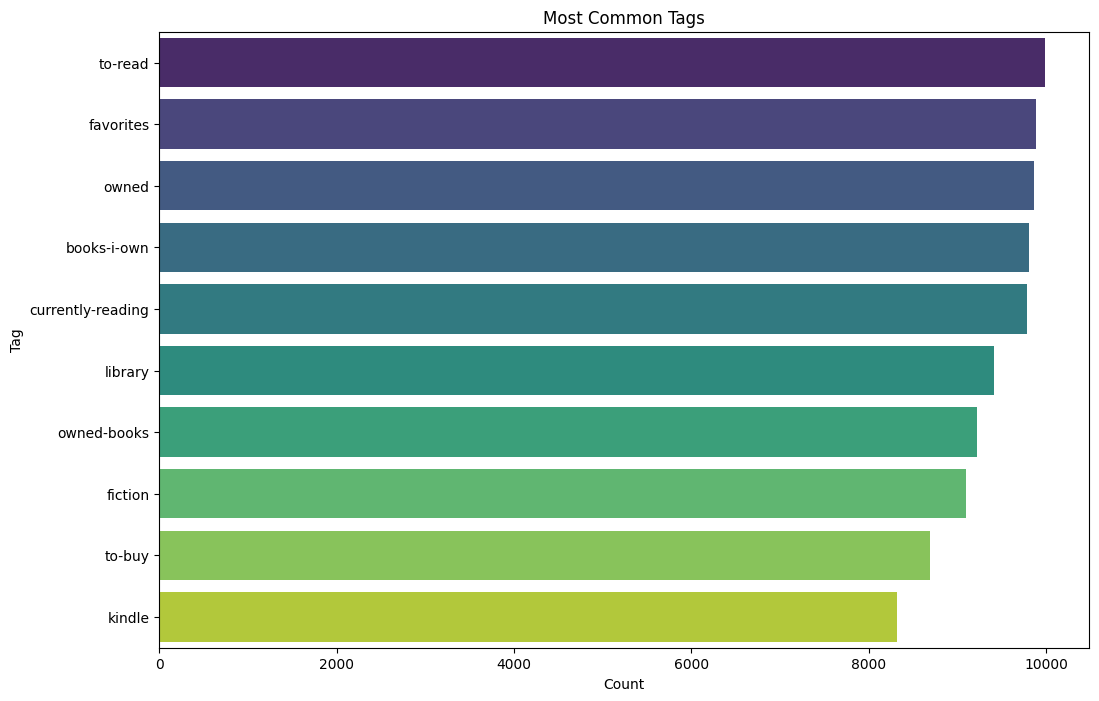

Most Common Tags:
tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
Name: count, dtype: int64


In [29]:
# Merge book tags with tags data
df_merged_tags = df_booktags.merge(df_tags, on='tag_id')

# Count the frequency of each tag
tag_counts = df_merged_tags['tag_name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='viridis')
plt.title('Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

print("Most Common Tags:")
print(tag_counts)


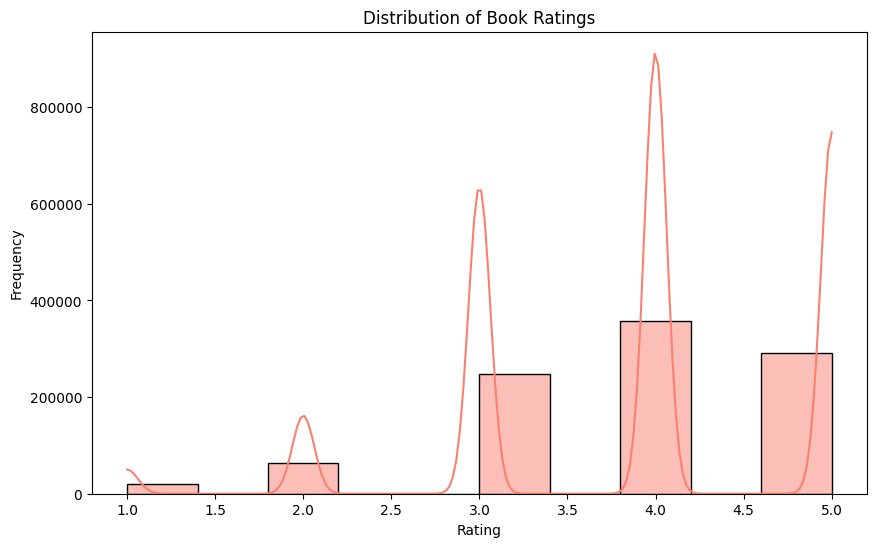

Top 10 Users by Average Rating Given:
user_id
25610    5.0
47335    5.0
2460     5.0
17647    5.0
22353    5.0
35197    5.0
12377    5.0
35207    5.0
47343    5.0
12378    5.0
Name: rating, dtype: float64


In [30]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_rating['rating'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average rating by user
average_rating_by_user = df_rating.groupby('user_id')['rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Users by Average Rating Given:")
print(average_rating_by_user)


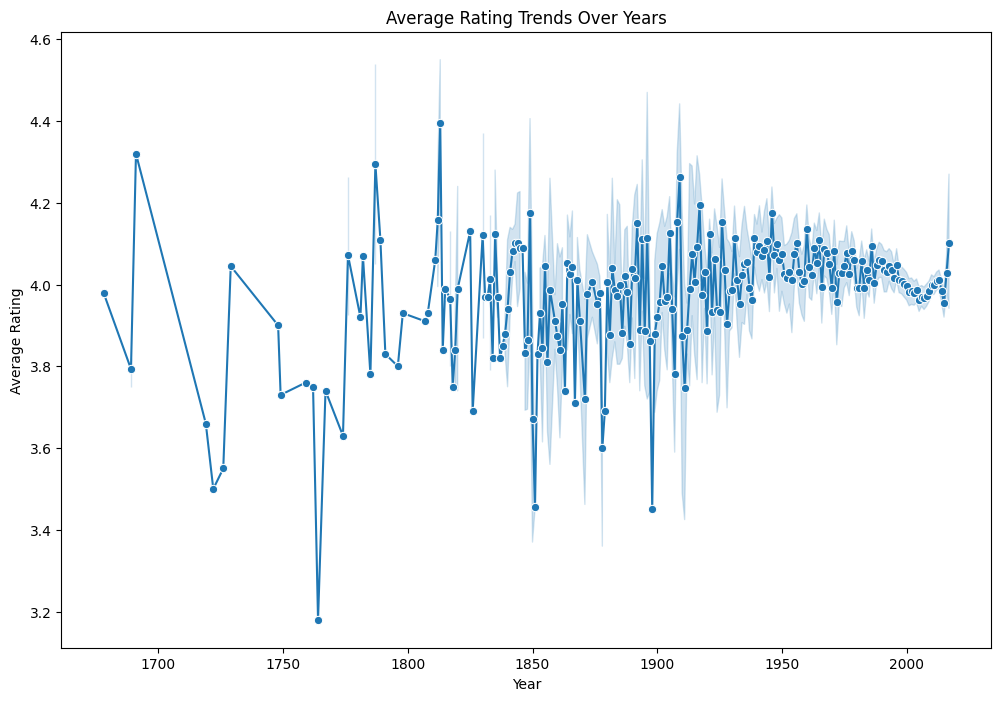

In [31]:
# Convert 'original_publication_year' to datetime
df_books['original_publication_year'] = pd.to_datetime(df_books['original_publication_year'], format='%Y', errors='coerce')
df_books['year'] = df_books['original_publication_year'].dt.year

# Rating trends over publication years
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='average_rating', data=df_books, marker='o')
plt.title('Average Rating Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


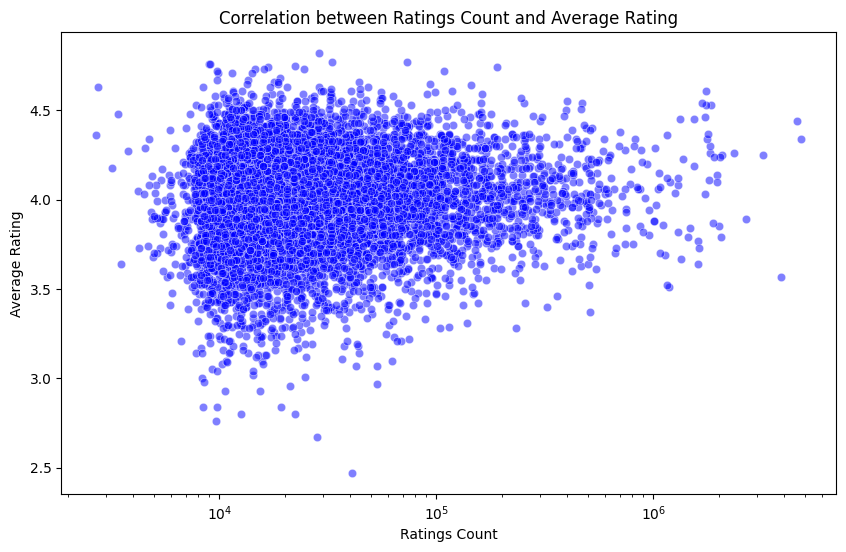

In [33]:
# Correlation between ratings count and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_books, x='ratings_count', y='average_rating', alpha=0.5, color='blue')
plt.title('Correlation between Ratings Count and Average Rating')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.xscale('log')  # Using logarithmic scale for better visualization
plt.show()

In [34]:
import unicodedata

# Remove special characters and convert to lowercase
df_tags['tag_name'] = df_tags['tag_name'].apply(lambda x: unicodedata.normalize('NFKC', x))
df_tags['tag_name'] = df_tags['tag_name'].str.replace('[^\w\s]', '', regex=True).str.lower()
df_tags['tag_name'] = df_tags['tag_name'].str.strip()

In [35]:
top_tags = df_booktags.groupby('goodreads_book_id').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)
top_tags = top_tags.merge(df_tags, how='left', on='tag_id')

In [36]:
books_tags_years = df_books.merge(top_tags, left_on='book_id', right_on='goodreads_book_id')

selected_genres = ['fantasy', 'romance', 'sciencefiction', 'nonfiction', 'mystery', 'historical', 'youngadult']

books_tags_years_filtered = books_tags_years[books_tags_years['tag_name'].isin(selected_genres)]

tags_by_year = books_tags_years_filtered.groupby(['original_publication_year', 'tag_name']).size().unstack(fill_value=0)

tags_by_year.tail()

tag_name,fantasy,mystery,nonfiction,romance,sciencefiction,youngadult
original_publication_year,,,,,,
2012-01-01,4,2,2,4,1,6
2013-01-01,3,5,1,11,2,1
2014-01-01,5,4,2,5,0,4
2015-01-01,5,1,0,1,0,2
2016-01-01,2,2,0,0,1,0


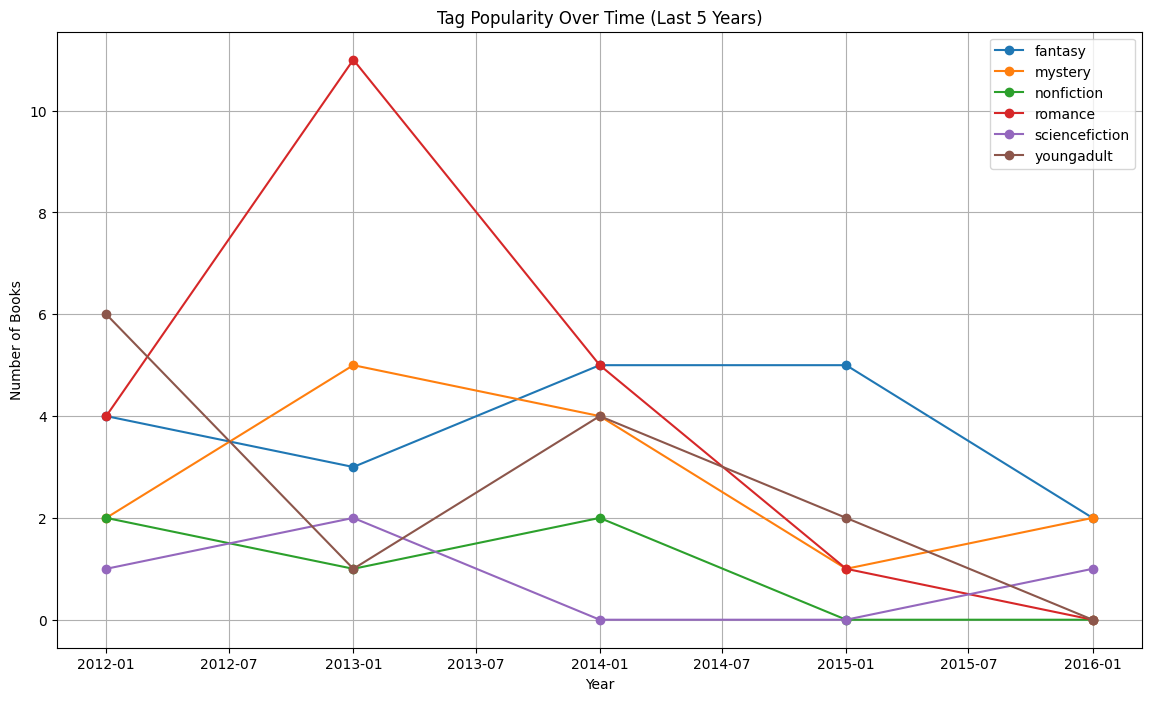

In [37]:
selected_years = tags_by_year.tail(5)  # Focus on the last 5 years available in the dataset

plt.figure(figsize=(14, 8))
for genre in selected_years.columns:
    plt.plot(selected_years.index, selected_years[genre], label=genre, marker='o')

plt.title('Tag Popularity Over Time (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
popular_genres = top_tags[top_tags['tag_name'].str.contains('fiction|fantasy|romance|thriller|historical|youngadult|classics|nonfiction', regex=True)]

books_with_genres = df_books.merge(popular_genres, left_on='book_id', right_on='goodreads_book_id')

average_ratings_by_genre = books_with_genres.groupby('tag_name')['average_rating'].mean().sort_values(ascending=False)

to_read_with_genres = df_toread.merge(books_with_genres[['book_id', 'tag_name']], on='book_id')
to_read_counts_by_genre = to_read_with_genres['tag_name'].value_counts().sort_values(ascending=False)

average_ratings_by_genre = pd.DataFrame(average_ratings_by_genre)

average_ratings_by_genre

,average_rating
tag_name,
christianfiction,4.415000
realisticfiction,4.340000
paranormalromance,4.286364
urbanfantasy,4.208125
historicalromance,4.130769
fantasy,4.086777
romance,4.056216
thriller,4.046000
sciencefiction,3.985000


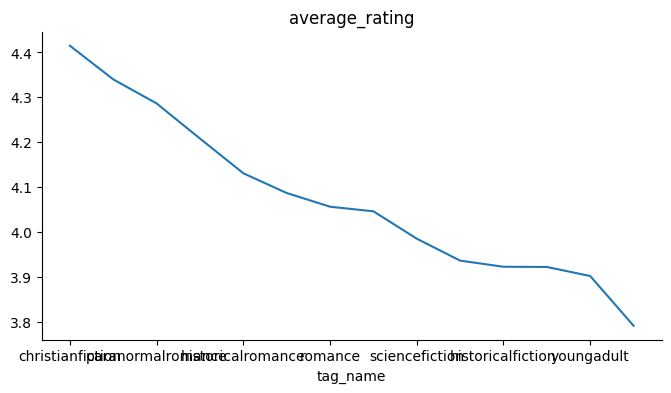

In [39]:
# @title average_rating

from matplotlib import pyplot as plt
average_ratings_by_genre['average_rating'].plot(kind='line', figsize=(8, 4), title='average_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<Figure size 1000x600 with 0 Axes>

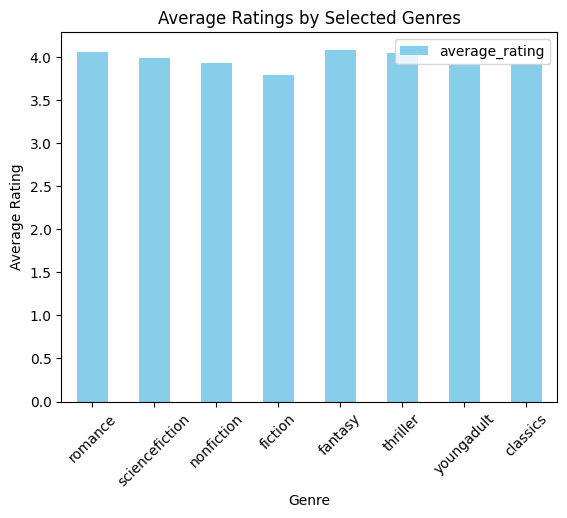

In [40]:
# Selecting a subset of genres for the graph to simplify
subset_genres = ['romance', 'sciencefiction', 'nonfiction',"fiction","fantasy","thriller", "youngadult", "classics"]
subset_average_ratings = average_ratings_by_genre.loc[subset_genres]

plt.figure(figsize=(10, 6))
subset_average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Selected Genres')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Author Analysis: Highest Average Ratings and Most Books Published

books_expanded_authors = df_books.assign(authors=df_books['authors'].str.split(',')).explode('authors')
books_expanded_authors['authors'] = books_expanded_authors['authors'].str.strip()

author_stats = books_expanded_authors.groupby('authors').agg(
    average_rating=pd.NamedAgg(column='average_rating', aggfunc='mean'),
    books_published=pd.NamedAgg(column='book_id', aggfunc='count')
).reset_index()

authors_high_ratings = author_stats[author_stats['books_published'] >= 5].sort_values(by='average_rating', ascending=False).head(10)

authors_most_books = author_stats.sort_values(by='books_published', ascending=False).head(10)

authors_high_ratings = pd.DataFrame(authors_high_ratings)
authors_most_books = pd.DataFrame(authors_most_books)
authors_high_ratings

,authors,average_rating,books_published
626,Bill Watterson,4.703077,13
3729,Mary GrandPré,4.545556,9
4936,Sarah J. Maas,4.453077,13
3556,Malcolm Jones III,4.442000,5
1849,Gary Smalley,4.430000,5
1735,Fiona Staples,4.418571,7
5461,Todd Klein,4.416000,10
2869,Jorge Luis Borges,4.390000,5
5,A.A. Milne,4.386667,6
631,Bisco Hatori,4.381667,6


In [42]:
authors_most_books

,authors,average_rating,books_published
2379,James Patterson,3.931735,98
5157,Stephen King,3.984227,97
4164,Nora Roberts,4.087692,65
1304,Dean Koontz,3.852969,64
5359,Terry Pratchett,4.134800,50
62,Agatha Christie,3.889302,43
2267,J.D. Robb,4.310976,41
4096,Neil Gaiman,4.198780,41
3812,Meg Cabot,3.798947,38
2426,Janet Evanovich,3.937027,37


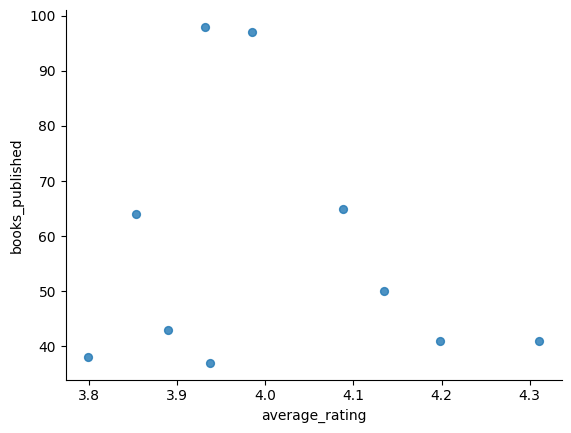

In [43]:
# @title average_rating vs books_published

from matplotlib import pyplot as plt
authors_most_books.plot(kind='scatter', x='average_rating', y='books_published', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
#select a random user
random_user = user_book_df.sample(1,random_state=689).index[0]

random_user_df = user_book_df[user_book_df.index == random_user]

books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read

NameError: name 'user_book_df' is not defined